In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
dataset.head(2)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0


In [34]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [35]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [6]:
!pip install minisom


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# Training the SOM
from minisom import MiniSom

In [37]:
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [38]:
# Initialize Weights
som.random_weights_init(X)

In [39]:
# Train Model
som.train_random(X,num_iteration=100)

In [40]:
# Visualizing results
from pylab import bone,pcolor,colorbar,plot,show

In [41]:
y.shape

(690, 1)

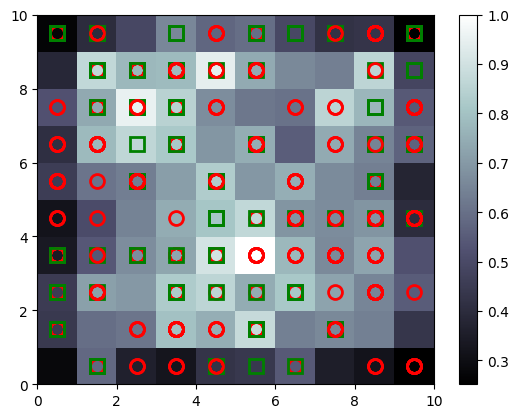

In [42]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[int(y[i])],
         markeredgecolor = colors[int(y[i])],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [43]:
mappings = som.win_map(X)

In [45]:
mappings.keys()

dict_keys([(1, 2), (5, 6), (1, 6), (1, 9), (2, 3), (1, 0), (2, 5), (4, 7), (1, 8), (5, 9), (9, 4), (9, 9), (0, 9), (9, 0), (2, 8), (0, 3), (4, 0), (0, 7), (4, 9), (8, 5), (6, 5), (7, 7), (7, 9), (0, 1), (3, 8), (3, 3), (9, 6), (6, 4), (8, 2), (9, 8), (8, 6), (8, 9), (3, 1), (5, 1), (0, 2), (8, 4), (0, 5), (6, 0), (4, 8), (0, 4), (6, 2), (4, 3), (7, 3), (9, 7), (3, 2), (5, 3), (7, 1), (2, 7), (8, 3), (4, 1), (3, 0), (4, 5), (1, 7), (4, 4), (6, 9), (3, 6), (6, 7), (1, 3), (0, 6), (5, 0), (3, 7), (5, 8), (8, 0), (6, 3), (7, 2), (4, 2), (1, 4), (8, 8), (3, 9), (8, 7), (2, 1), (5, 4), (9, 2), (2, 0), (1, 5), (2, 6), (5, 2), (3, 4), (7, 6), (7, 4)])

In [54]:
frauds = np.concatenate([mappings[(5,3)],mappings[(2,7)],mappings[(4,8)]]) 

In [56]:
frauds = sc.inverse_transform(frauds)

In [57]:
frauds

array([[1.5719940e+07, 0.0000000e+00, 3.5170000e+01, 3.7500000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 2.0100000e+02],
       [1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 5.4000000e+01],
       [1.5761733e+07, 0.0000000e+00, 1.6080000e+01, 3.3500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.2700000e+02],
       [1.5770995e+07, 0.0000000e+00, 4.0330000e+01, 8.1250000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00,